In [ ]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt 
import os

In [485]:
chile_df = pd.read_csv('data/chile.csv',  low_memory=False)
argentina_df = pd.read_csv('data/argentina.csv',  low_memory=False)
antartica_df = pd.read_csv('data/antartica.csv',  low_memory=False)

In [486]:
#info que muestre todos los datos 
chile_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9481 entries, 0 to 9480
Data columns (total 146 columns):
 #    Column               Dtype  
---   ------               -----  
 0    occurrence_no        int64  
 1    record_type          object 
 2    reid_no              float64
 3    flags                object 
 4    collection_no        int64  
 5    accepted_name        object 
 6    accepted_attr        float64
 7    accepted_rank        object 
 8    accepted_no          float64
 9    early_interval       object 
 10   late_interval        object 
 11   max_ma               float64
 12   min_ma               float64
 13   ref_author           object 
 14   ref_pubyr            int64  
 15   reference_no         int64  
 16   phylum               object 
 17   phylum_no            object 
 18   class                object 
 19   class_no             object 
 20   order                object 
 21   order_no             object 
 22   family               object 
 23   family_no  

In [487]:
argentina_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31881 entries, 0 to 31880
Data columns (total 146 columns):
 #    Column               Dtype  
---   ------               -----  
 0    occurrence_no        int64  
 1    record_type          object 
 2    reid_no              float64
 3    flags                object 
 4    collection_no        int64  
 5    accepted_name        object 
 6    accepted_attr        float64
 7    accepted_rank        object 
 8    accepted_no          float64
 9    early_interval       object 
 10   late_interval        object 
 11   max_ma               float64
 12   min_ma               float64
 13   ref_author           object 
 14   ref_pubyr            int64  
 15   reference_no         int64  
 16   phylum               object 
 17   phylum_no            object 
 18   class                object 
 19   class_no             object 
 20   order                object 
 21   order_no             object 
 22   family               object 
 23   family_no

In [488]:
antartica_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11311 entries, 0 to 11310
Data columns (total 146 columns):
 #    Column               Dtype  
---   ------               -----  
 0    occurrence_no        int64  
 1    record_type          object 
 2    reid_no              float64
 3    flags                object 
 4    collection_no        int64  
 5    accepted_name        object 
 6    accepted_attr        float64
 7    accepted_rank        object 
 8    accepted_no          float64
 9    early_interval       object 
 10   late_interval        object 
 11   max_ma               float64
 12   min_ma               float64
 13   ref_author           object 
 14   ref_pubyr            int64  
 15   reference_no         int64  
 16   phylum               object 
 17   phylum_no            object 
 18   class                object 
 19   class_no             object 
 20   order                object 
 21   order_no             object 
 22   family               object 
 23   family_no

Como grupo fuimos viendo manualmente que columnas nos servirian para poder responder las preguntas planteadas en la propuesta inicial, y llegamos a un concenso de elegir las siguientes 19 columnas como base para poder responder estas.

In [489]:
columns = [
    'species_name',
    'occurrence_no',
    'accepted_name',
    'accepted_rank',
    'early_interval',
    'late_interval',
    'max_ma',
    'min_ma',
    'phylum',
    'class',
    'order',
    'family',
    'genus',
    'lat',
    'lng',
    'diet',
    'geogscale',
    'life_habit',
    "environment",
    "taxon_environment",
    "primary_name"
]

#Hacer que los df solo tengan las columnas que necesitamos
chile_df = chile_df[columns].copy()
argentina_df = argentina_df[columns].copy()
antartica_df = antartica_df[columns].copy()

In [490]:
chile_df

,species_name,occurrence_no,accepted_name,accepted_rank,early_interval,late_interval,max_ma,min_ma,phylum,class,order,family,genus,lat,lng,diet,geogscale,life_habit,environment,taxon_environment,primary_name
0,ceciliana,16417,Leionucula,genus,Maastrichtian,NaN,72.10,66.000,Mollusca,Bivalvia,Nuculida,Nuculidae,Leionucula,-37.000000,-73.000000,"deposit feeder, suspension feeder",basin,infaunal,NaN,"coastal,inner shelf,outer shelf,oceanic",Leionucula
1,amuriensis,16418,Nuculana,genus,Maastrichtian,NaN,72.10,66.000,Mollusca,Bivalvia,Nuculanida,Nuculanidae,Nuculana,-37.000000,-73.000000,"deposit feeder, suspension feeder",basin,infaunal,NaN,"coastal,inner shelf,outer shelf,oceanic",Nuculana
2,cuneiformis,16419,Nuculana,genus,Maastrichtian,NaN,72.10,66.000,Mollusca,Bivalvia,Nuculanida,Nuculanidae,Nuculana,-37.000000,-73.000000,"deposit feeder, suspension feeder",basin,infaunal,NaN,"coastal,inner shelf,outer shelf,oceanic",Nuculana
3,levitestata,16420,Yoldia,genus,Maastrichtian,NaN,72.10,66.000,Mollusca,Bivalvia,Nuculanida,Yoldiidae,Yoldia,-37.000000,-73.000000,deposit feeder,basin,infaunal,NaN,"inner shelf,outer shelf,oceanic",Yoldia
4,pencana,16421,Neiloides,genus,Maastrichtian,NaN,72.10,66.000,Mollusca,Bivalvia,Nuculida,NO_FAMILY_SPECIFIED,Neiloides,-37.000000,-73.000000,deposit feeder,basin,infaunal,NaN,NaN,Neiloides
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9476,sp.,1659402,Ostrea,genus,Turonian,Campanian,93.90,72.100,Mollusca,Bivalvia,Ostreida,Ostreidae,Ostrea,-50.884998,-72.625000,suspension feeder,NaN,epifaunal,basinal (siliciclastic),"hypersaline,marine,brackish",Ostrea
9477,antarctica,1659403,Cucullaea antarctica,species,Turonian,Campanian,93.90,72.100,Mollusca,Bivalvia,Arcida,Cucullaeidae,Cucullaea,-50.884998,-72.625000,suspension feeder,NaN,infaunal,basinal (siliciclastic),NaN,Cucullaea
9478,sp.,1659404,Nucula,genus,Turonian,Campanian,93.90,72.100,Mollusca,Bivalvia,Nuculida,Nuculidae,Nucula,-50.884998,-72.625000,"deposit feeder, suspension feeder",NaN,infaunal,basinal (siliciclastic),"coastal,inner shelf,outer shelf,oceanic",Nucula
9479,saladensis,1660104,Micrauchenia saladensis,species,Tortonian,Messinian,11.63,5.333,Chordata,Mammalia,Panameriungulata,Macraucheniidae,Micrauchenia,-27.684723,-70.949997,herbivore,NaN,scansorial,coastal indet.,terrestrial,Micrauchenia


In [491]:
obtener_duplicados_chile = chile_df.duplicated(keep=False)
datos_duplicados_chile = chile_df[obtener_duplicados_chile]
datos_duplicados_chile

,species_name,occurrence_no,accepted_name,accepted_rank,early_interval,late_interval,max_ma,min_ma,phylum,class,order,family,genus,lat,lng,diet,geogscale,life_habit,environment,taxon_environment,primary_name


In [492]:
obtener_duplicados_argentina = chile_df.duplicated(keep=False)
datos_duplicados_argentina = chile_df[obtener_duplicados_argentina]
datos_duplicados_argentina

,species_name,occurrence_no,accepted_name,accepted_rank,early_interval,late_interval,max_ma,min_ma,phylum,class,order,family,genus,lat,lng,diet,geogscale,life_habit,environment,taxon_environment,primary_name


In [493]:
obtener_duplicados_antartica = antartica_df.duplicated(keep=False)
datos_duplicados_antartica = antartica_df[obtener_duplicados_antartica]
datos_duplicados_antartica

,species_name,occurrence_no,accepted_name,accepted_rank,early_interval,late_interval,max_ma,min_ma,phylum,class,order,family,genus,lat,lng,diet,geogscale,life_habit,environment,taxon_environment,primary_name


In [494]:
chile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9481 entries, 0 to 9480
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species_name       9481 non-null   object 
 1   occurrence_no      9481 non-null   int64  
 2   accepted_name      9343 non-null   object 
 3   accepted_rank      9343 non-null   object 
 4   early_interval     9481 non-null   object 
 5   late_interval      1605 non-null   object 
 6   max_ma             9481 non-null   float64
 7   min_ma             9481 non-null   float64
 8   phylum             9337 non-null   object 
 9   class              9292 non-null   object 
 10  order              9123 non-null   object 
 11  family             8914 non-null   object 
 12  genus              8574 non-null   object 
 13  lat                9481 non-null   float64
 14  lng                9481 non-null   float64
 15  diet               8749 non-null   object 
 16  geogscale          6426 

In [495]:
argentina_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31881 entries, 0 to 31880
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species_name       31881 non-null  object 
 1   occurrence_no      31881 non-null  int64  
 2   accepted_name      31253 non-null  object 
 3   accepted_rank      31253 non-null  object 
 4   early_interval     31881 non-null  object 
 5   late_interval      5288 non-null   object 
 6   max_ma             31881 non-null  float64
 7   min_ma             31881 non-null  float64
 8   phylum             31226 non-null  object 
 9   class              31038 non-null  object 
 10  order              29738 non-null  object 
 11  family             29056 non-null  object 
 12  genus              27398 non-null  object 
 13  lat                31881 non-null  float64
 14  lng                31881 non-null  float64
 15  diet               24717 non-null  object 
 16  geogscale          256

In [496]:
antartica_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11311 entries, 0 to 11310
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species_name       11311 non-null  object 
 1   occurrence_no      11311 non-null  int64  
 2   accepted_name      10977 non-null  object 
 3   accepted_rank      10977 non-null  object 
 4   early_interval     11311 non-null  object 
 5   late_interval      2888 non-null   object 
 6   max_ma             11311 non-null  float64
 7   min_ma             11311 non-null  float64
 8   phylum             10960 non-null  object 
 9   class              10926 non-null  object 
 10  order              10744 non-null  object 
 11  family             10604 non-null  object 
 12  genus              10375 non-null  object 
 13  lat                11311 non-null  float64
 14  lng                11311 non-null  float64
 15  diet               7706 non-null   object 
 16  geogscale          828

In [497]:
chile_df['era_early'] = None
argentina_df['era_early'] = None
antartica_df['era_early'] = None

In [498]:
chile_df['era_late'] = None
argentina_df['era_late'] = None
antartica_df['era_late'] = None

In [499]:
cambrian_intervals = [
    "Early Terreneuvian", "Middle Terreneuvian", "Late Terreneuvian", "Terreneuvian",
    "Early Series 2", "Middle Series 2", "Late Series 2", "Series 2",
    "Early Miaolingian", "Middle Miaolingian", "Late Miaolingian", "Miaolingian",
    "Early Furongian", "Middle Furongian", "Late Furongian", "Furongian",
    "Early Fortunian", "Middle Fortunian", "Late Fortunian", "Fortunian",
    "Early Stage 2", "Middle Stage 2", "Late Stage 2", "Stage 2",
    "Early Stage 3", "Middle Stage 3", "Late Stage 3", "Stage 3",
    "Early Stage 4", "Middle Stage 4", "Late Stage 4", "Stage 4",
    "Early Wuliuan", "Middle Wuliuan", "Late Wuliuan", "Wuliuan",
    "Early Drumian", "Middle Drumian", "Late Drumian", "Drumian",
    "Early Guzhangian", "Middle Guzhangian", "Late Guzhangian", "Guzhangian",
    "Early Paibian", "Middle Paibian", "Late Paibian", "Paibian",
    "Early Jiangshanian", "Middle Jiangshanian", "Late Jiangshanian", "Jiangshanian",
    "Early Stage 10", "Middle Stage 10", "Late Stage 10", "Stage 10"
]


silurian_intervals = [
    "Early Rhuddanian", "Middle Rhuddanian", "Late Rhuddanian", "Rhuddanian",
    "Early Aeronian", "Middle Aeronian", "Late Aeronian", "Aeronian",
    "Early Telychian", "Middle Telychian", "Late Telychian", "Telychian",
    "Early Sheinwoodian", "Middle Sheinwoodian", "Late Sheinwoodian", "Sheinwoodian",
    "Early Homerian", "Middle Homerian", "Late Homerian", "Homerian",
    "Early Gorstian", "Middle Gorstian", "Late Gorstian", "Gorstian",
    "Early Ludfordian", "Middle Ludfordian", "Late Ludfordian", "Ludfordian",
    "Early Llandovery", "Middle Llandovery", "Late Llandovery", "Llandovery",
    "Early Wenlock", "Middle Wenlock", "Late Wenlock", "Wenlock",
    "Early Ludlow", "Middle Ludlow", "Late Ludlow", "Ludlow",
    "Early Pridoli", "Middle Pridoli", "Late Pridoli", "Pridoli"
]


devonian_intervals = [
    "Early Lochkovian", "Middle Lochkovian", "Late Lochkovian", "Lochkovian",
    "Early Pragian", "Middle Pragian", "Late Pragian", "Pragian",
    "Early Emsian", "Middle Emsian", "Late Emsian", "Emsian",
    "Early Eifelian", "Middle Eifelian", "Late Eifelian", "Eifelian",
    "Early Givetian", "Middle Givetian", "Late Givetian", "Givetian",
    "Early Fransnian", "Middle Fransnian", "Late Fransnian", "Fransnian",
    "Early Famennian", "Middle Famennian", "Late Famennian", "Famennian",
    "Early Devonian", "Middle Devonian", "Late Devonian"
]


carboniferous_intervals = [
    "Early Tournaisian", "Middle Tournaisian", "Late Tournaisian", "Tournaisian",
    "Early Visean", "Middle Visean", "Late Visean", "Visean",
    "Early Serpukhovian", "Middle Serpukhovian", "Late Serpukhovian", "Serpukhovian",
    "Early Bashkirian", "Middle Bashkirian", "Late Bashkirian", "Bashkirian",
    "Early Moscovian", "Middle Moscovian", "Late Moscovian", "Moscovian",
    "Early Kasimovian", "Middle Kasimovian", "Late Kasimovian", "Kasimovian",
    "Early Gzhelian", "Middle Gzhelian", "Late Gzhelian", "Gzhelian",
    "Early Mississippian", "Middle Mississippian", "Late Mississippian", "Mississippian",
    "Early Pennsylvanian", "Middle Pennsylvanian", "Late Pennsylvanian", "Pennsylvanian"
]

permian_intervals = [
    "Early Asselian", "Middle Asselian", "Late Asselian", "Asselian",
    "Early Sakmarian", "Middle Sakmarian", "Late Sakmarian", "Sakmarian",
    "Early Artinskian", "Middle Artinskian", "Late Artinskian", "Artinskian",
    "Early Kungurian", "Middle Kungurian", "Late Kungurian", "Kungurian",
    "Early Roadian", "Middle Roadian", "Late Roadian", "Roadian",
    "Early Wordian", "Middle Wordian", "Late Wordian", "Wordian",
    "Early Capitanian", "Middle Capitanian", "Late Capitanian", "Capitanian",
    "Early Wuchiapingian", "Middle Wuchiapingian", "Late Wuchiapingian", "Wuchiapingian",
    "Early Changhsingian", "Middle Changhsingian", "Late Changhsingian", "Changhsingian",
    "Early Cisuralian", "Middle Cisuralian", "Late Cisuralian", "Cisuralian",
    "Early Guadalupian", "Middle Guadalupian", "Late Guadalupian", "Guadalupian",
    "Early Lopingian", "Middle Lopingian", "Late Lopingian", "Lopingian"
]


ordovician_intervals = [
    "Early Ordovician", "Middle Ordovician", "Late Ordovician",
    "Early Tremadocian", "Middle Tremadocian", "Late Tremadocian", "Tremadocian",
    "Early Floian", "Middle Floian", "Late Floian", "Floian",
    "Early Dapingian", "Middle Dapingian", "Late Dapingian", "Dapingian",
    "Early Darriwilian", "Middle Darriwilian", "Late Darriwilian", "Darriwilian",
    "Early Sandbian", "Middle Sandbian", "Late Sandbian", "Sandbian",
    "Early Katian", "Middle Katian", "Late Katian", "Katian",
    "Early Hirnantian", "Middle Hirnantian", "Late Hirnantian", "Hirnantian"
]

triassic_intervals = [
    "Early Induan", "Middle Induan", "Late Induan", "Induan",
    "Early Anisian", "Middle Anisian", "Late Anisian", "Anisian",
    "Early Ladinian", "Middle Ladinian", "Late Ladinian", "Ladinian",
    "Early Carnian", "Middle Carnian", "Late Carnian", "Carnian",
    "Early Norian", "Middle Norian", "Late Norian", "Norian",
    "Early Rhaetian", "Middle Rhaetian", "Late Rhaetian", "Rhaetian",
    "Early Triassic", "Middle Triassic", "Late Triassic"
]


neogene_intervals = [
    "Early Miocene", "Middle Miocene", "Late Miocene", "Miocene",
    "Early Pliocene", "Middle Pliocene", "Late Pliocene", "Pliocene",
    "Early Aquitanian", "Middle Aquitanian", "Late Aquitanian", "Aquitanian",
    "Early Burdigalian", "Middle Burdigalian", "Late Burdigalian", "Burdigalian",
    "Early Langhian", "Middle Langhian", "Late Langhian", "Langhian",
    "Early Serrevallian", "Middle Serrevallian", "Late Serrevallian", "Serrevallian",
    "Early Tortonian", "Middle Tortonian", "Late Tortonian", "Tortonian",
    "Early Messinian", "Middle Messinian", "Late Messinian", "Messinian",
    "Early Zanclean", "Middle Zanclean", "Late Zanclean", "Zanclean",
    "Early Piacenzian", "Middle Piacenzian", "Late Piacenzian", "Piacenzian"
]


quaternary_intervals = [
    "Early Pleistocene", "Middle Pleistocene", "Late Pleistocene", "Pleistocene",
    "Early Gelasian", "Middle Gelasian", "Late Gelasian", "Gelasian",
    "Early Calabrian", "Middle Calabrian", "Late Calabrian", "Calabrian",
    "Early Chibanian", "Middle Chibanian", "Late Chibanian", "Chibanian"
]


# Agregar los intervalos para el Jurásico
jurassic_intervals = [
    "Early Hettangian", "Middle Hettangian", "Late Hettangian", "Hettangian",
    "Early Sinemurian", "Middle Sinemurian", "Late Sinemurian", "Sinemurian",
    "Early Pliensbachian", "Middle Pliensbachian", "Late Pliensbachian", "Pliensbachian",
    "Early Toarcian", "Middle Toarcian", "Late Toarcian", "Toarcian",
    "Early Aalenian", "Middle Aalenian", "Late Aalenian", "Aalenian",
    "Early Bajocian", "Middle Bajocian", "Late Bajocian", "Bajocian",
    "Early Bathonian", "Middle Bathonian", "Late Bathonian", "Bathonian",
    "Early Callovian", "Middle Callovian", "Late Callovian", "Callovian",
    "Early Oxfordian", "Middle Oxfordian", "Late Oxfordian", "Oxfordian",
    "Early Kimmeridgian", "Middle Kimmeridgian", "Late Kimmeridgian", "Kimmeridgian",
    "Early Tithonian", "Middle Tithonian", "Late Tithonian", "Tithonian",
    "Early Jurassic", "Middle Jurassic", "Late Jurassic"
]


paleogene_intervals = [
    "Early Paleocene", "Middle Paleocene", "Late Paleocene", "Paleocene",
    "Early Eocene", "Middle Eocene", "Late Eocene", "Eocene",
    "Early Oligocene", "Middle Oligocene", "Late Oligocene", "Oligocene",
    "Early Danian", "Middle Danian", "Late Danian", "Danian",
    "Early Selandian", "Middle Selandian", "Late Selandian", "Selandian",
    "Early Thanetian", "Middle Thanetian", "Late Thanetian", "Thanetian",
    "Early Ypresian", "Middle Ypresian", "Late Ypresian", "Ypresian",
    "Early Lutetian", "Middle Lutetian", "Late Lutetian", "Lutetian",
    "Early Bartonian", "Middle Bartonian", "Late Bartonian", "Bartonian",
    "Early Priabonian", "Middle Priabonian", "Late Priabonian", "Priabonian",
    "Early Rupelian", "Middle Rupelian", "Late Rupelian", "Rupelian",
    "Early Chattian", "Middle Chattian", "Late Chattian", "Chattian"
]

cretaceous_intervals = [
    "Early Berriasian", "Middle Berriasian", "Late Berriasian", "Berriasian",
    "Early Valanginian", "Middle Valanginian", "Late Valanginian", "Valanginian",
    "Early Hauterivian", "Middle Hauterivian", "Late Hauterivian", "Hauterivian",
    "Early Barremian", "Middle Barremian", "Late Barremian", "Barremian",
    "Early Aptian", "Middle Aptian", "Late Aptian", "Aptian",
    "Early Albian", "Middle Albian", "Late Albian", "Albian",
    "Early Cenomanian", "Middle Cenomanian", "Late Cenomanian", "Cenomanian",
    "Early Turonian", "Middle Turonian", "Late Turonian", "Turonian",
    "Early Coniacian", "Middle Coniacian", "Late Coniacian", "Coniacian",
    "Early Santonian", "Middle Santonian", "Late Santonian", "Santonian",
    "Early Campanian", "Middle Campanian", "Late Campanian", "Campanian",
    "Early Maastrichtian", "Middle Maastrichtian", "Late Maastrichtian", "Maastrichtian",
    "Early Cretaceous", "Late Cretaceous"
]

nan = [np.nan]

In [500]:
def assign_era(row):
    if row['early_interval'] in cambrian_intervals:
        return 'Cambrian'
    elif row['early_interval'] in silurian_intervals:
        return 'Silurian'
    elif row['early_interval'] in devonian_intervals:
        return 'Devonian'
    elif row['early_interval'] in carboniferous_intervals:
        return 'Carboniferous'
    elif row['early_interval'] in permian_intervals:
        return 'Permian'
    elif row['early_interval'] in ordovician_intervals:
        return 'Ordovician'  # Añadimos la condición para Ordovícico
    elif row['early_interval'] in triassic_intervals:
        return 'Triassic'  # Añadimos la condición para Triásico
    elif row['early_interval'] in neogene_intervals:
        return 'Neogene'
    elif row['early_interval'] in quaternary_intervals:  # Añadimos la condición para Cuaternario
        return 'Quaternary'
    elif row['early_interval'] in jurassic_intervals:  # Añadimos la condición para Jurásico
        return 'Jurassic'
    elif row['early_interval'] in paleogene_intervals:  # Añadimos la condición para Paleógeno
        return 'Paleogene'
    elif row['early_interval'] in cretaceous_intervals:  # Añadimos la condición para Cretácico
        return 'Cretaceous'
    else:
        return row['early_interval']

In [501]:
chile_df['era_early'] = chile_df.apply(assign_era, axis=1)
argentina_df['era_early'] = argentina_df.apply(assign_era, axis=1)
antartica_df['era_early'] = antartica_df.apply(assign_era, axis=1)

In [502]:
def assign_era_late(row):
    if row['late_interval'] in cambrian_intervals:
        return 'Cambrian'
    elif row['late_interval'] in silurian_intervals:
        return 'Silurian'
    elif row['late_interval'] in devonian_intervals:
        return 'Devonian'
    elif row['late_interval'] in carboniferous_intervals:
        return 'Carboniferous'
    elif row['late_interval'] in permian_intervals:
        return 'Permian'
    elif row['late_interval'] in ordovician_intervals:
        return 'Ordovician'  
    elif row['late_interval'] in triassic_intervals:
        return 'Triassic'  
    elif row['late_interval'] in neogene_intervals:
        return 'Neogene'
    elif row['late_interval'] in quaternary_intervals:  
        return 'Quaternary'
    elif row['late_interval'] in jurassic_intervals:  
        return 'Jurassic'
    elif row['late_interval'] in paleogene_intervals:  
        return 'Paleogene'
    elif row['late_interval'] in cretaceous_intervals:  
        return 'Cretaceous'
    elif row['late_interval'] in nan:
        return "No especificado"
    else:
        return row['early_interval']

In [503]:
chile_df['era_late'] = chile_df.apply(assign_era_late, axis=1)
argentina_df['era_late'] = argentina_df.apply(assign_era_late, axis=1)
antartica_df['era_late'] = antartica_df.apply(assign_era_late, axis=1)

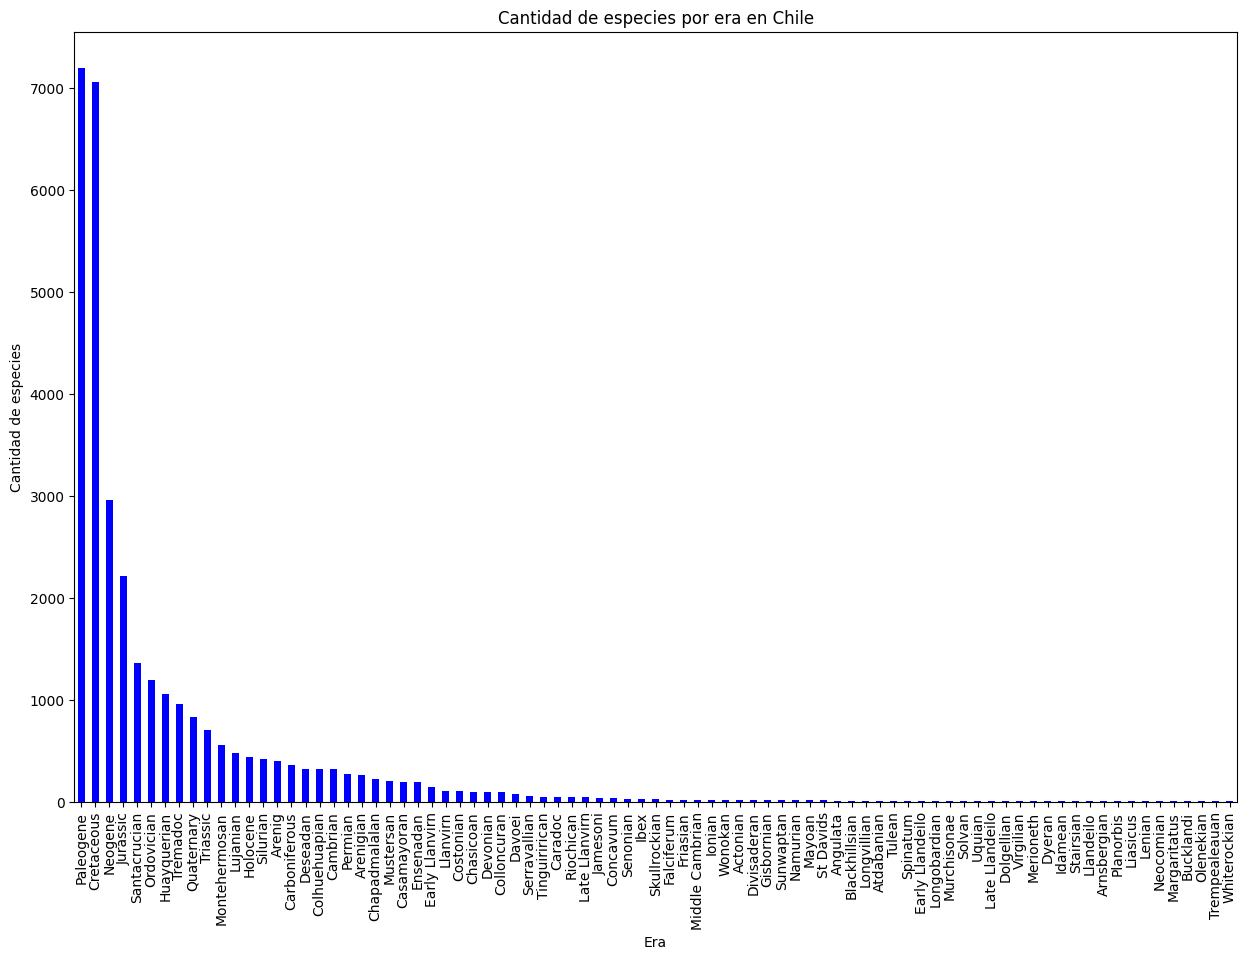

In [ ]:
#Hagamos un histograma que muestre la cantidad de especies por era en Chile por columna de era_early
argentina_df['era_early'].value_counts().plot(kind='bar', color='blue', figsize=(15, 10))
plt.title('Cantidad de especies por era en Chile')
plt.xlabel('Era')
plt.ylabel('Cantidad de especies')
plt.show()

In [ ]:
#Muestrame todas las eras que esten en era_early
antartica_df['era_early'].unique()
chile_df['era_early'].unique()
argentina_df['era_early'].unique()


eras_filtradas = ['Rhyacian', 'Orosirian', 'Statherian', 'Calymmian', 'Ectasian', 'Stenian', 'Tonian', 'Cryogenian', 'Ediacaran', 'Cambrian', 'Ordovician', 'Silurian', 'Devonian', 'Carboniferous', 'Permian', 'Triassic', 'Jurassic', 'Cretaceous', 'Paleogene', 'Neogene', 'Quaternary']
chile_df[~chile_df['era_early'].isin(eras_filtradas)]['era_early'].unique()

array(['Arenig', 'Early Llanvirn', 'Casamayoran', 'Planorbis',
       'Serravallian', 'Margaritatus', 'Variabilis', 'Opalinum',
       'Angulata', 'Obtusum', 'Falciferum', 'Colhuehuapian', 'Sevatian',
       'Santacrucian', 'Holocene', 'Friasian', 'Bifrons', 'Murchisonae',
       'Jamesoni', 'Spinatum', 'Ibex', 'Davoei', 'Tinguirirican',
       'Lujanian', 'Neocomian', 'Paleozoic', 'Phanerozoic'], dtype=object)

In [515]:
argentina_df[~argentina_df['era_early'].isin(eras_filtradas)]['era_early'].unique()


array(['Tremadoc', 'Arenig', 'Llanvirn', 'Gisbornian', 'Early Llanvirn',
       'Caradoc', 'Early Llandeilo', 'Costonian', 'Actonian',
       'Late Llandeilo', 'Longvillian', 'Llandeilo', 'Middle Cambrian',
       'Dolgellian', 'Merioneth', 'Trempealeauan', 'Idamean', 'Sunwaptan',
       'Chasicoan', 'Montehermosan', 'Huayquerian', 'Riochican',
       'Chapadmalalan', 'Deseadan', 'Mustersan', 'Arenigian',
       'Colhuehuapian', 'Santacrucian', 'Divisaderan', 'Ensenadan',
       'Colloncuran', 'Lujanian', 'Casamayoran', 'Davoei', 'Planorbis',
       'Liasicus', 'Bucklandi', 'Angulata', 'Jamesoni', 'Namurian',
       'Senonian', 'Lenian', 'Holocene', 'Neocomian', 'Serravallian',
       'St Davids', 'Solvan', 'Concavum', 'Murchisonae', 'Ionian',
       'Atdabanian', 'Late Llanvirn', 'Olenekian', 'Falciferum',
       'Longobardian', 'Whiterockian', 'Skullrockian', 'Virgilian',
       'Mayoan', 'Arnsbergian', 'Tinguirirican', 'Dyeran', 'Ibex',
       'Margaritatus', 'Spinatum', 'Uquian', '

In [516]:
antartica_df[~antartica_df['era_early'].isin(eras_filtradas)]['era_early'].unique()

array(['Floran', 'Atdabanian', 'Neocomian', 'Lenian', 'Toyonian',
       'Botomian', 'Holocene', 'Dresbachian', 'Tremadoc',
       'Early Cambrian', 'Middle Cambrian'], dtype=object)